### Building a Deep Learning model using Keras Functional API with below mentioned dimensions and parameters.

- The model has **10** inputs, **3** hidden layers with **10**, **20**, and **10** neurons, and an output layer with **1** output. 
  

- **Rectified linear** activation functions are used in each hidden layer and a **sigmoid** activation function is used in the output layer, for binary classification.

In [ ]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
def build_model():
    visible = Input(shape = (10,))
    hidden1 = Dense(10, activation = 'relu')(visible)
    hidden2 = Dense(20, activation = 'relu')(hidden1)
    hidden3 = Dense(10, activation = 'relu')(hidden2)
    output = Dense(1, activation = 'sigmoid')(hidden3)

    model = Model(inputs = visible, outputs = output)

    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


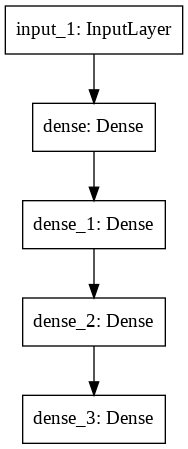

In [ ]:
# Plot graph
plot_model(model)

### Building a Deep Learning model using Keras Functional API with below mentioned dimensions and parameters.

- The model receives **black and white 64×64** images as input.

- It then has a sequence of two convolutional and max pooling layers (1C --> 1MP --> 1C --> 1MP) as feature extractors, having **32** and then **16** hidden units in the Convolutional layers respectively. Both convolutional layers use **relu** activation and a kernel size of **4**.

- MaxPooling layers have a pool size of **2x2**.

- It is followed by a **flatten** layer, and then a **fully connected** layer with **10** hidden units and **relu** activation to interpret the features and an output layer with a **sigmoid** activation for two-class predictions.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model

In [ ]:
def build_model():
    # Build model here.
    visible = Input(shape=(64, 64, 1))
    conv1 = Conv2D(32, kernel_size = 4, activation = 'relu')(visible)
    pool1 = MaxPooling2D(pool_size= (2, 2))(conv1)
    conv2 = Conv2D(16, kernel_size = 4, activation = 'relu')(pool1)
    pool2 = MaxPooling2D(pool_size= (2, 2))(conv2)
    flat = Flatten()(pool2)
    hidden1 = Dense(10, activation = 'relu')(flat)
    output = Dense(1, activation= 'sigmoid')(hidden1)

    model = Model(inputs = visible, outputs = output)

    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2705

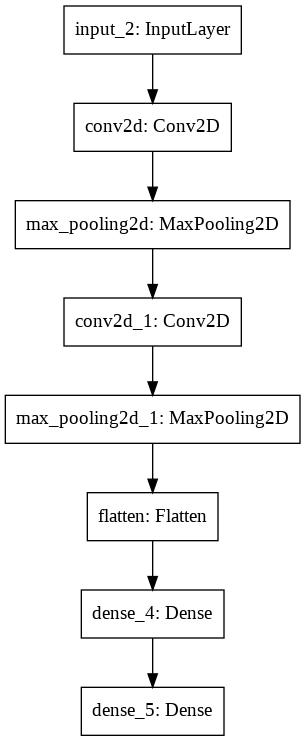

In [ ]:
# Plot graph
plot_model(model)

### Building a Deep Learning model using Keras Functional API with below mentioned dimensions and parameters.

- The model expects **100** time steps of **one** feature as input.

- The model has a single **LSTM** hidden layer to extract features from the sequence that contains **10** hidden units.

- It is followed by a **fully connected** layer to interpret the LSTM output having **10** hidden units and relu activation.

- And is then followed by an output layer for making **binary** predictions.

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
def build_model():
    # Build model here.
    visible = Input(shape = (100, 1))
    lstm = LSTM(10, activation= 'relu')(visible)
    fc = Dense(10, activation= 'relu')(lstm)
    output = Dense(1, activation= 'sigmoid')(fc)

    model = Model(inputs = visible, outputs = output)

    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


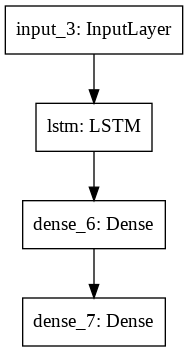

In [ ]:
# Plot graph
plot_model(model, to_file='recurrent_neural_network.png')

## Build a Recurrent Neural Network to classify Spam and Ham text messages using Kera Fucntional API

In [ ]:
import pandas as pd
sms = pd.read_csv("https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/sms_spam.csv")

In [ ]:
sms.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


### Store the messages in a list.

- Convert the **'text'** column of the **sms** dataframe into a python list using the `list` function. 

In [ ]:
def make_msg_list():
    texts = list(sms['text']) # Write code to convert text column of sms dataframe to a list.

    return texts

In [ ]:
texts = make_msg_list()

### Store the type in a list with Spam as 1 and Ham as 0.

- Use `pd.get_dummies` function on the **'type'** column of sms dataframe.

- Select only the 'spam' column of the created dummies and wrap it in the `list` function.

In [ ]:
def make_type_list():
    labels = list(pd.get_dummies(sms['type'])['spam'])# Write code to store the type in a list with spam as 1 and ham as 0.

    return labels

In [ ]:
labels = make_type_list()

### Tokenize the texts.

- Create a **tokenizer** object of **Tokenizer** class having `num_words` equal to **max_words**.

- Fit the **tokenizer** on **texts** using `fit_on_texts` method.

- Create **sequences** using the `texts_to_sequences` method of **tokenizer** on **texts**.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
max_words = 10000

In [ ]:
def tokenize_fn(max_words, texts):
    tokenizer = Tokenizer(num_words=max_words) # Instantiate Tokenizer here.
    # Write code to fit tokenizer on texts.
    tokenizer.fit_on_texts(texts)
    
    sequences = tokenizer.texts_to_sequences(texts) # Write code to create sequences using tokenizer on texts.

    return tokenizer, sequences

In [ ]:
tokenizer, sequences = tokenize_fn(max_words, texts)

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8953 unique tokens.


### Pad the sequences.

- Pad the **sequences** using the `pad_sequences` function having `maxlen` equal to **maxlen**.

In [ ]:
maxlen = 100

In [ ]:
def padding_fn(sequences, maxlen):
    data = pad_sequences(sequences, maxlen= 100)# Write code to pad sequences here.

    return data

In [ ]:
data = padding_fn(sequences, maxlen)

In [ ]:
print('Shape of data tensor:', data.shape)

Shape of data tensor: (5559, 100)


In [ ]:
labels = np.asarray(labels)
print('Shape of label tensor:', labels.shape)

Shape of label tensor: (5559,)


### Build a model using the Keras Functional API.

- It takes in an **input** of shape **(100,)**.

- This is followed by an **Embedding** layer having `input_dim` equal to **max_features**, and `output_dim` equal to **embedding_dim**.

- Then comes a **LSTM** layer having **128** hidden units.

- After this, the last layer is the **output** layer having appropriate hidden units and activation function for a **binary classification** problem.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
embedding_dim = 64
max_features = len(word_index) + 1

In [ ]:
def build_model(max_features, embedding_dim):
    # Build model here.
    input_layer = Input(shape = 100,)
    embedding_layer = Embedding(max_features, embedding_dim)(input_layer)
    lstm_layer = LSTM(128, activation= 'relu')(embedding_layer)
    output_layer = Dense(1, activation= 'sigmoid')(lstm_layer)
    model = Model(input_layer, output_layer)

    return model

In [ ]:
model = build_model(max_features, embedding_dim)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 64)           573056    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 672,001
Trainable params: 672,001
Non-trainable params: 0
_________________________________________________________________


### Compile the model.

- Use **adam** `optimizer`.

- Use appropriate `loss` for a **binary classification** problem.

- Use **'acc'** as the `metrics`.

In [ ]:
def compile_model(model):
    # Compile model here.
    model.compile(optimizer='adam', metrics= ['acc'], loss = 'binary_crossentropy')

    return model

In [ ]:
model = compile_model(model)

### Fit the model.

- Fit the model on **data**, and **labels**.

- Specify **10** `epochs` and a `batch_size` of **64**.

- Specify a `validation_split` of **20%**.

In [ ]:
def fit_model(model):
    history = model.fit(data, labels, validation_split= 0.2, epochs=10, batch_size= 64)# Fit model here.

    return model, history

In [ ]:
model, history = fit_model(model)

Epoch 1/10
70/70 [==============================] - 19s 225ms/step - loss: 0.5878 - acc: 0.8740 - val_loss: 0.5492 - val_acc: 0.8651
Epoch 2/10
70/70 [==============================] - 16s 223ms/step - loss: 46541473.8435 - acc: 0.8587 - val_loss: 5.5770 - val_acc: 0.9074
Epoch 3/10
70/70 [==============================] - 15s 218ms/step - loss: 0.4607 - acc: 0.9276 - val_loss: 1.3123 - val_acc: 0.9496
Epoch 4/10
70/70 [==============================] - 15s 216ms/step - loss: 231756490113485.6250 - acc: 0.9544 - val_loss: 21653676032.0000 - val_acc: 0.1349
Epoch 5/10
70/70 [==============================] - 15s 221ms/step - loss: 26773305733.5370 - acc: 0.1347 - val_loss: 9781779456.0000 - val_acc: 0.1349
Epoch 6/10
70/70 [==============================] - 15s 217ms/step - loss: 1625949991.6419 - acc: 0.4027 - val_loss: 416976.0312 - val_acc: 0.9056
Epoch 7/10
70/70 [==============================] - 15s 218ms/step - loss: 4627.3937 - acc: 0.9637 - val_loss: 0.5973 - val_acc: 0.9460
Ep

### Question 11: Plot Training and Validation Accuracy and Loss.

- Use `plot_graphs` function to plot training and validation accuracy and loss plots.

- For **accuracy** plots, specify:

  - `epochs`: epochs

  - `training_metric`: acc
  
  - `validation_metric`: val_acc
  
  - `label_title_metric`: 'Accuracy'

- For **loss** plots, specify:

  - `epochs`: epochs

  - `training_metric`: loss
  
  - `validation_metric`: val_loss
  
  - `label_title_metric`: 'Loss'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

In [ ]:
def plot_graphs(epochs, training_metric, validation_metric, label_title_metric):
    plt.plot(epochs, training_metric, 'r', label='Training {}'.format(label_title_metric))
    plt.plot(epochs, validation_metric, 'b', label='Validation {}'.format(label_title_metric))
    plt.title('Training and Validation {}'.format(label_title_metric))
    plt.legend()

In [ ]:
def training_validation_plots():
    # Accuray plot
    # Write code to plot the accuracy plots.
    plot_graphs(epochs, acc, val_acc, 'Accuracy')
    
    plt.figure()

    # Loss plot
    # Write code to plot the loss plots.
    plot_graphs(epochs, loss, val_loss, 'Loss')

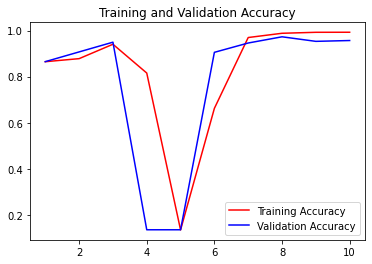

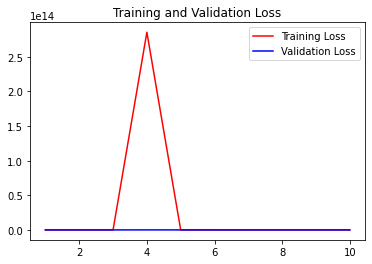

In [ ]:
training_validation_plots()